In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
control_df = pd.read_csv("../Dataset/train_radiomics_occipital_CONTROL.csv")
train_df = pd.read_csv("../Dataset/train_radiomics_hipocamp.csv")
test_df = pd.read_csv("../Dataset/test_radiomics_hipocamp.csv")

In [3]:
def show_histogram(df,title="histogram"):
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.17)
    plt.title(title)
    sns.histplot(df)
    plt.show()

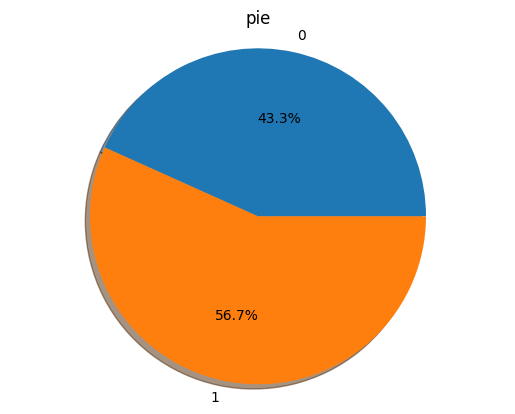

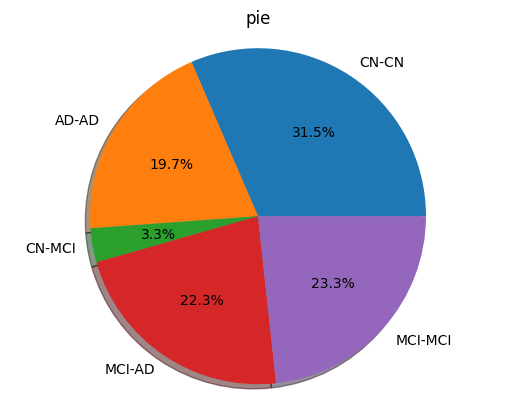

In [4]:
def show_pie(df,title="pie"):
    labels = df.unique().tolist()
    counts = df.value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    _, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct="%1.1f%%",shadow=True)
    ax1.axis("equal")
    plt.title(title)
    plt.show()

show_pie(control_df["Sex"])
show_pie(control_df["Transition"])

In [5]:
def show_heatmap(df,title="correlation heatmap"):
    df = df.select_dtypes(include="number")
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.25,left=0.22,right=0.95)
    plt.xticks(rotation=15)
    plt.title(title)
    sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
    plt.show()

In [6]:
def show_boxplot(df,title="boxplot"):
    plt.figure(figsize=(13,8))
    plt.subplots_adjust(bottom=0.17)
    df.boxplot()
    plt.xticks(rotation=15)
    plt.title(title)
    plt.show()


In [7]:
def detect_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar os outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    show_boxplot(title=f"{column} boxplot",df=df[[column]])

    print(outliers[column])

# IQR method 
## considera como outliers os dados que estao 1.5*IQR acima e abaixo do primeiro e terceiro quartil, respetivamente. IQR = Q3 - Q1

In [8]:
def explore_outliers(df,columns):
    number_df = df[columns].select_dtypes(include="number")
    n_columns = number_df.columns
    # normalização para ser visualmente perceptivel nos plots
    scaler = MinMaxScaler()
    number_df_scaled = pd.DataFrame(scaler.fit_transform(number_df),columns=n_columns)

    for i in range(0, len(n_columns),7):
        show_boxplot(df=number_df_scaled[n_columns[i:i+7]])
        
# esta função faz um loop de 7 em 7 colunas por todas as colunas do dataset para uma analise geral dos outliers.
# esta operacao é demorada e nao muito boa porque 2181 / 7 = 300 vezes


In [9]:
def main_exploration(df):
    print(df.shape) 
main_exploration(control_df)

(305, 2181)


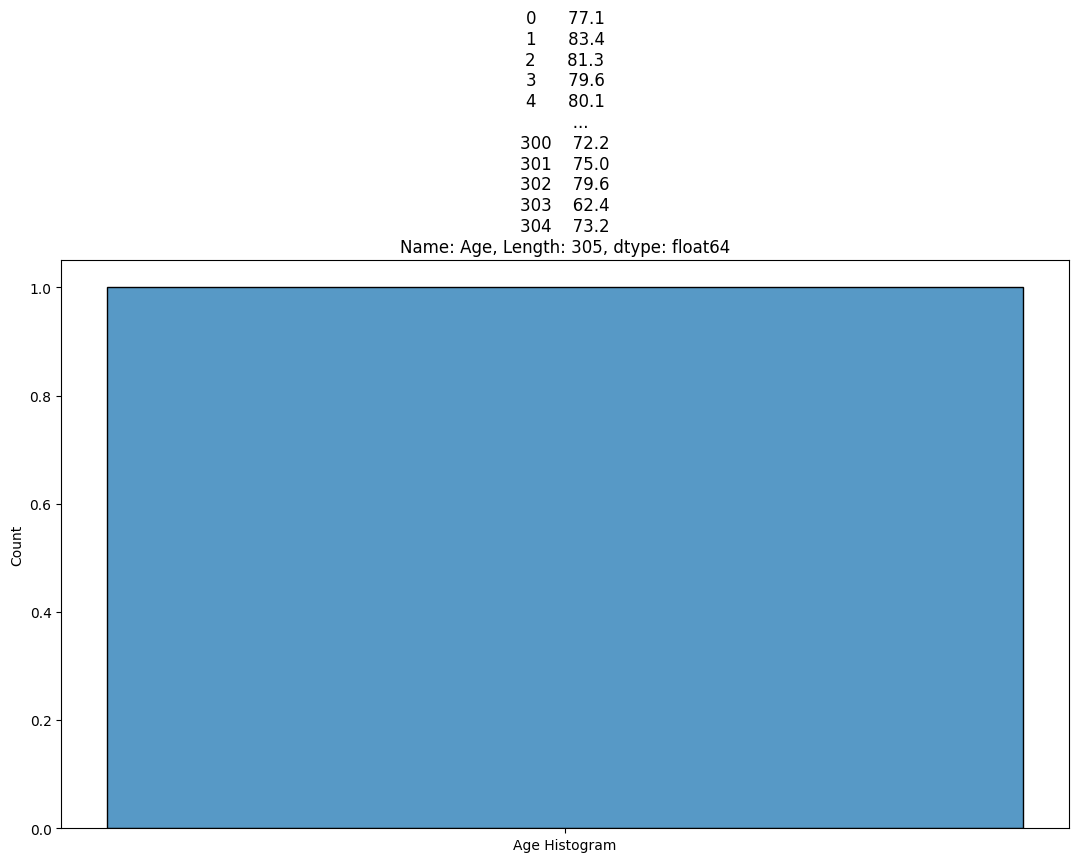

count    305.000000
mean      75.171148
std        6.675866
min       55.300000
25%       71.300000
50%       75.000000
75%       79.900000
max       91.000000
Name: Age, dtype: float64


TypeError: detect_outliers() missing 1 required positional argument: 'column'

In [10]:
def numerical_exploration(df):
    # age exploration
    show_histogram("Age Histogram",df["Age"])
    print(df["Age"].describe())
    detect_outliers("Age")
numerical_exploration(control_df)

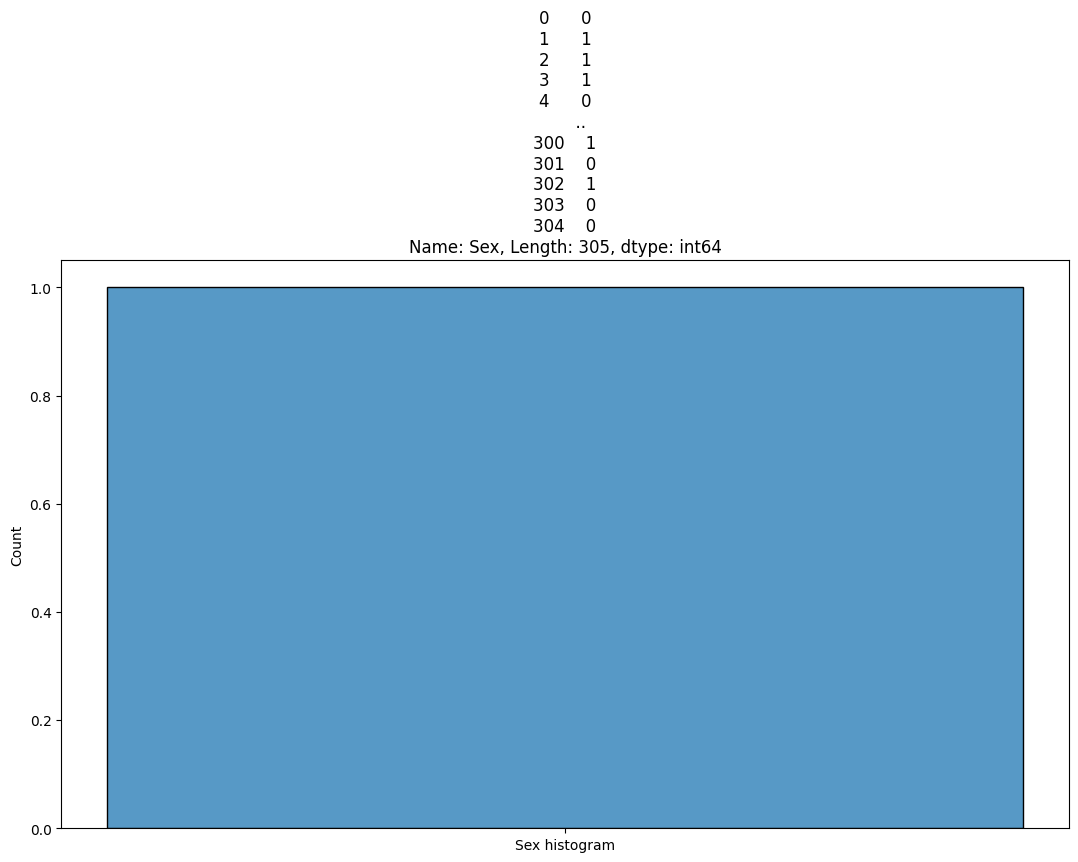

Sex
1    173
0    132
Name: count, dtype: int64


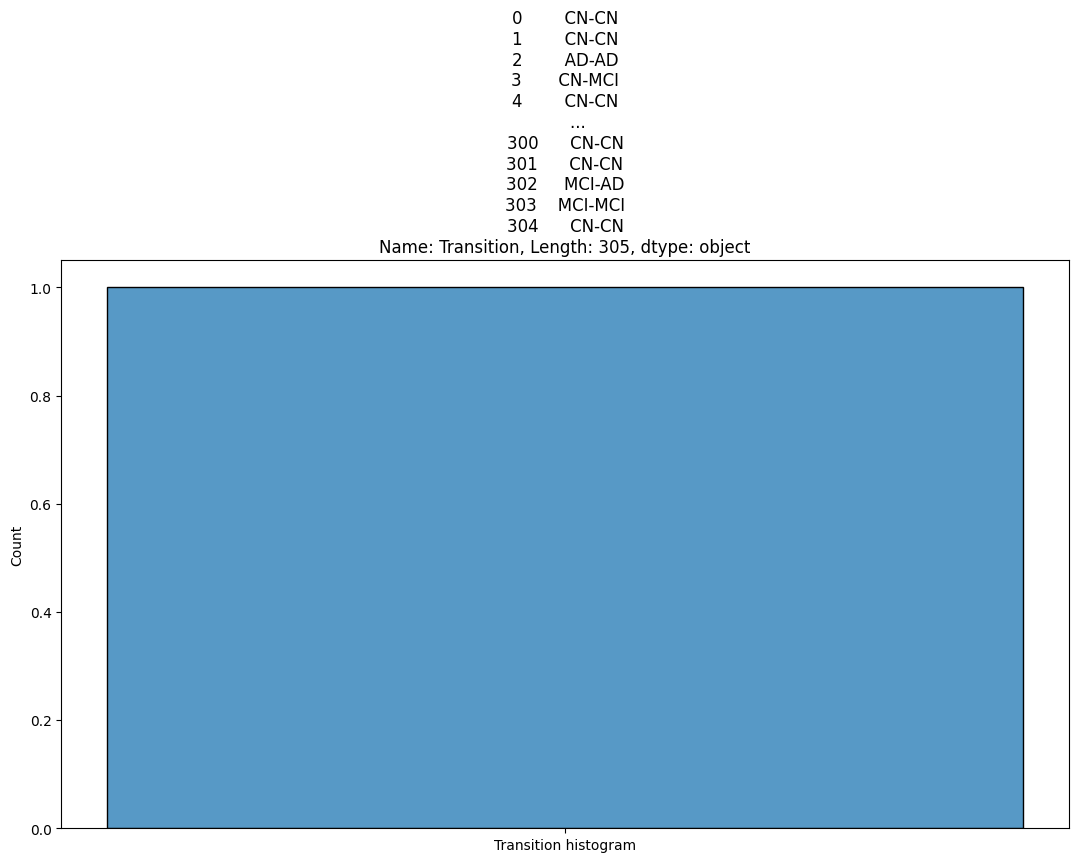

Transition
CN-CN      96
MCI-MCI    71
MCI-AD     68
AD-AD      60
CN-MCI     10
Name: count, dtype: int64


In [11]:
def categorical_exploration(df):
    """
    Transition description:
    CN - Cognitive Normal, estado normal
    MCI - Mild Cognitive Impairment, estado entre o avanço normal da perda de memoria com a idade e um certo declinio serio de demencia
    AD - Azlheimer Disease, forma mais comum de demencia nas pessoas mais velhas
    """
    categorical_df = df[["Sex","Transition"]]

    for column in categorical_df.columns:
        show_histogram(f"{column} histogram",categorical_df[column])
        print(df[column].value_counts())

categorical_exploration(control_df)

In [12]:
diagnostics_versions_columns = ["diagnostics_Versions_PyRadiomics","diagnostics_Versions_Numpy","diagnostics_Versions_SimpleITK","diagnostics_Versions_PyWavelet","diagnostics_Versions_Python"] 
def diagnostics_versions_explorer(df):

    for column in diagnostics_versions_columns:
        print(column,": ")
        values = df[column].unique()
        print(values)

control_df = control_df.drop(columns=diagnostics_versions_columns,axis=1)


In [ ]:
def diagnostics_image_explorer(df):
    diagnostics_image_columns = ["diagnostics_Image-original_Dimensionality","diagnostics_Image-original_Spacing","diagnostics_Image-original_Size","diagnostics_Image-original_Mean","diagnostics_Image-original_Minimum","diagnostics_Image-original_Maximum"]

    for column in diagnostics_image_columns:
        print(column,": ")
        values = df[column].unique()
        print(values)
        show_histogram(title=column,df=df[column])

    explore_outliers(columns=diagnostics_image_columns)

    print(df[diagnostics_image_columns].describe())
    print(df[diagnostics_image_columns].info())
    
# é necessário explorar melhor

In [18]:
diagnostics_mask_columns = ["diagnostics_Mask-original_Spacing","diagnostics_Mask-original_Size","diagnostics_Mask-original_BoundingBox","diagnostics_Mask-original_VoxelNum","diagnostics_Mask-original_VolumeNum","diagnostics_Mask-original_CenterOfMassIndex","diagnostics_Mask-original_CenterOfMass"]
def diagnostics_mask_explorer(df):

    
    for column in diagnostics_mask_columns:
        print(column,": ")
        values = df[column].unique()
        #print(values)
        show_histogram(title=column,df=df[column])
    

    detect_outliers("diagnostics_Mask-original_VoxelNum")
    detect_outliers("diagnostics_Mask-original_VolumeNum")
    explore_outliers(columns=diagnostics_mask_columns)
    
    print(df[diagnostics_mask_columns].describe(),"\n")
    print(df[diagnostics_mask_columns].info())
    
# é preciso explorar muito melhor


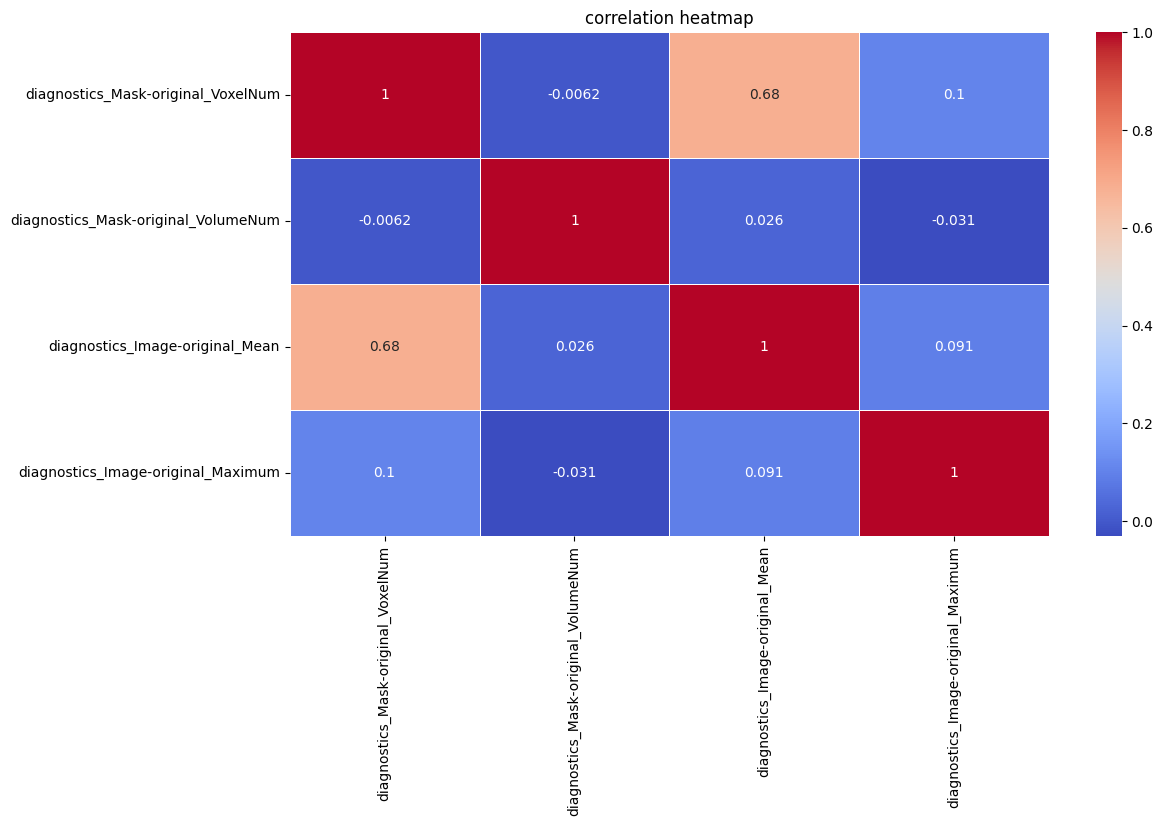

In [20]:
diagnostics = ["diagnostics_Mask-original_Spacing","diagnostics_Mask-original_Size","diagnostics_Mask-original_BoundingBox","diagnostics_Mask-original_VoxelNum","diagnostics_Mask-original_VolumeNum","diagnostics_Mask-original_CenterOfMassIndex","diagnostics_Mask-original_CenterOfMass","diagnostics_Image-original_Spacing","diagnostics_Image-original_Size","diagnostics_Image-original_Mean","diagnostics_Image-original_Maximum"]
def masks_images_correlation(df):

    show_heatmap(df=df[diagnostics])
    
# ainda nao consigo tirar conclusões ao certo

masks_images_correlation(control_df)

In [26]:
def target_handler(df, target="Transition"):
    le_make = LabelEncoder()
    df[f"{target}_code"] = le_make.fit_transform(df[target])

target_handler(control_df)

In [ ]:
new_control_df = control_df.select_dtypes(include="number")
x = new_control_df.drop(columns=["Transition_code"],axis=1)
y = new_control_df["Transition_code"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

lr_model = LogisticRegression(random_state=2001, solver="newton-cg",max_iter=3000)
lr_model.fit(x_train,y_train)
preds = lr_model.predict(x_test)
print(f"Classification Report:\n{classification_report(y_test,preds)}")